# Data exploration

## The dataset

In [1]:
from utils import get_data, array_to_tensor, show_images

In [2]:
Xtr, Xte, Ytr = get_data()
print("X train: ", Xtr.shape)
print("X test:  ", Xte.shape)
print("Y train: ", Ytr.shape)

X train:  (5000, 3072)
X test:   (2000, 3072)
Y train:  (5000,)


In [7]:
print(f"There are {Ytr.max()+1} classes, from {Ytr.min()} to {Ytr.max()}")

There are 10 classes, from 0 to 9


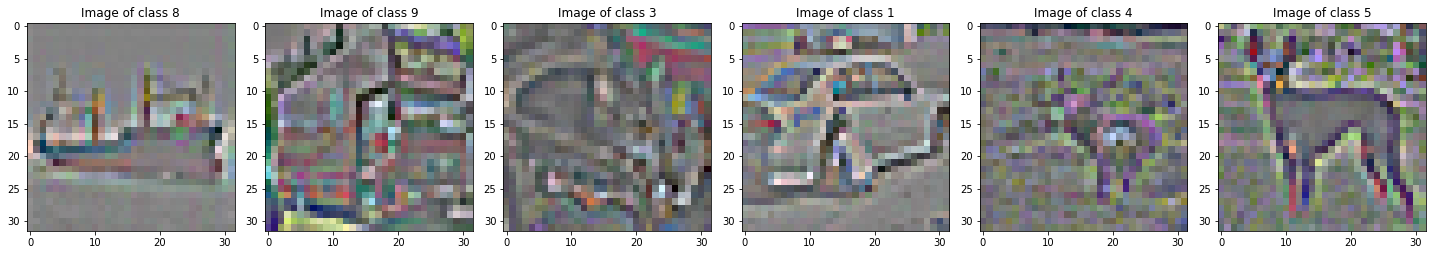

In [4]:
Xtr_tensor = array_to_tensor(Xtr)
show_images(Xtr_tensor, Ytr)

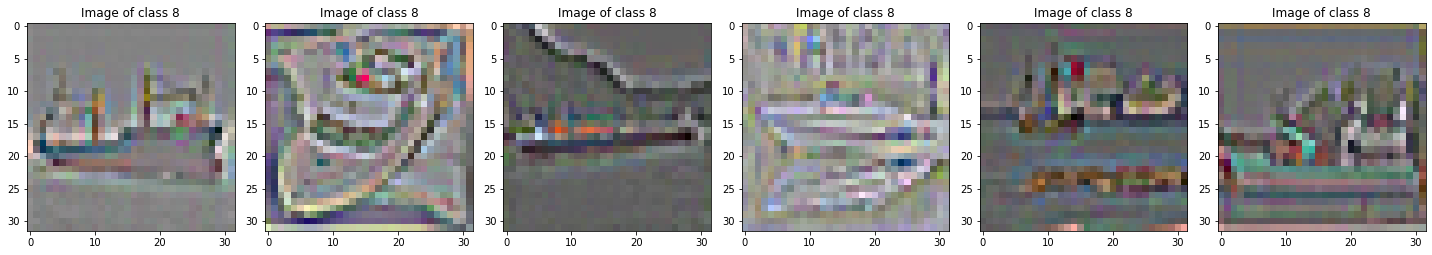

In [5]:
# show images of boat only (first index)
show_images(Xtr_tensor[Ytr==8], Ytr[Ytr==8])

## Visualization

In [22]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap


In [23]:
reducer = umap.UMAP()


In [24]:
embedding = reducer.fit_transform(Xtr)
embedding.shape


(5000, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

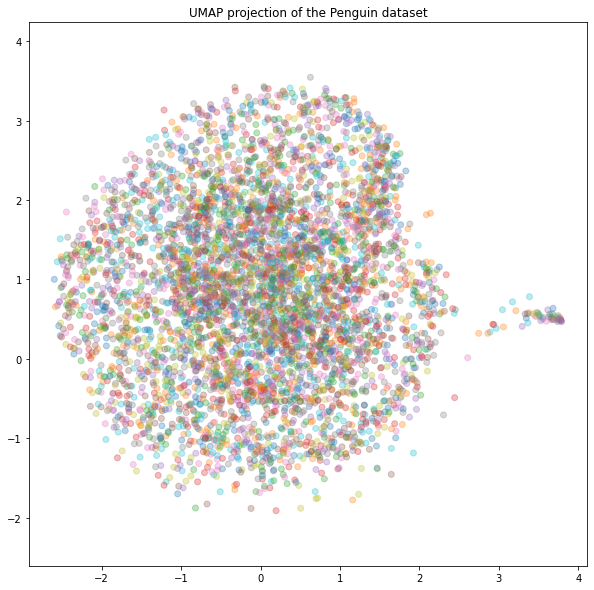

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in Ytr],
    alpha=.3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset')


In [ ]:
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral')